In [3]:
#Please DO NOT RUN! This is for printing versions of my packages.
import sys  # Import sys to get Python version
import matplotlib
import scipy
import pandas
import numpy as np

# Print the version of each package
print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("Matplotlib version:",matplotlib.__version__)
print("SciPy version:", scipy.__version__)
print("Pandas version:", pandas.__version__)

Python version: 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
NumPy version: 1.23.5
Matplotlib version: 3.4.2
SciPy version: 1.9.1
Pandas version: 1.5.3


### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`


In [1]:
# Import the necessary libraries
import numpy as np # For calculations
import matplotlib.pyplot as plt # For plotting 
from scipy.optimize import curve_fit # For curve fitting
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator) #make plot nicer
import pandas as pd # For reading the data
import os #For flexible path way to data

**Section a)**


In [3]:
# Define the path in a more flexible way
root_file = os.getcwd()
data_file = os.path.join(root_file, "co2_mm_mlo.txt")

#Read data file using pandas package
data = pd.read_csv(data_file, delim_whitespace=True, comment='#', header=None)
data.columns = ['year', ' ','decimal_date', 'monthly_average', 'de-seasonalized', '#days', 'st.dev_of_days', 'unc_of_mon_mean']
data.head()

,year,,decimal_date,monthly_average,de-seasonalized,#days,st.dev_of_days,unc_of_mon_mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


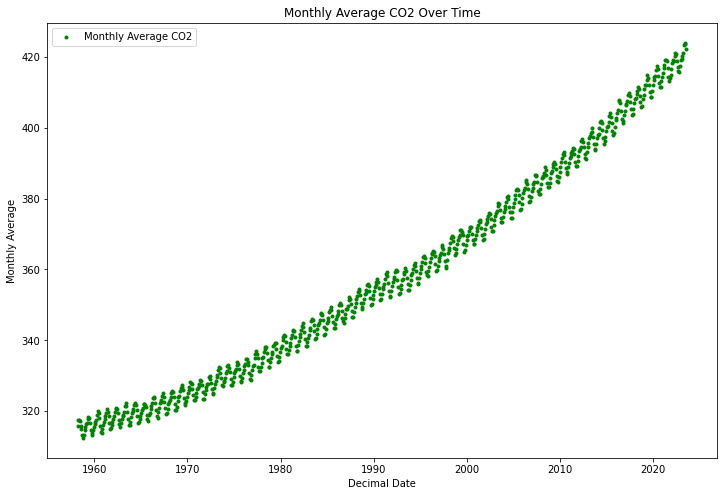

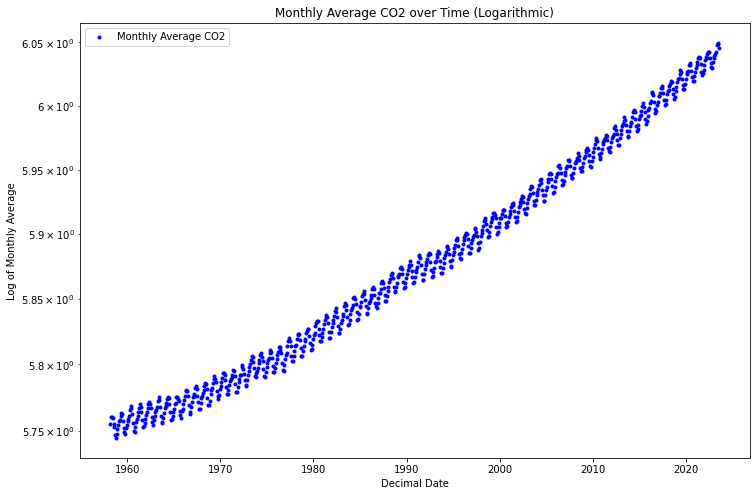

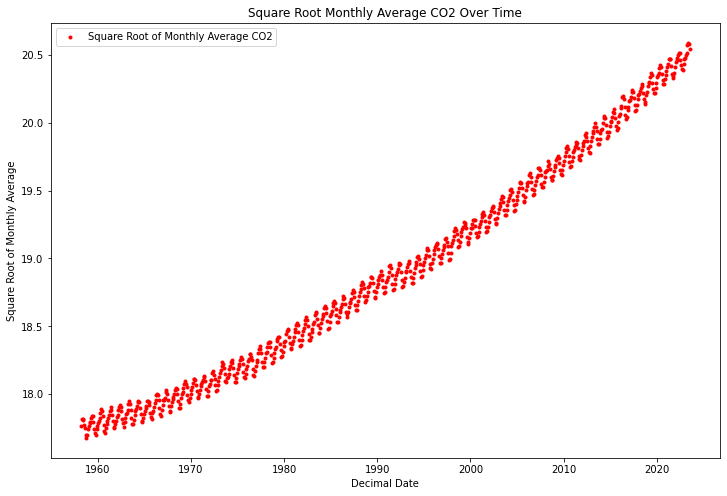

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Extract 'Decimal Date' and 'Monthly Average' columns
x = data['decimal_date']
y = data['monthly_average']

# Plot 1: Scatter plot of Decimal Date vs. Monthly Average
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='green', marker=".",label='Monthly Average CO2')
plt.xlabel('Decimal Date')
plt.ylabel('Monthly Average')
plt.title('Monthly Average CO2 Over Time')
plt.legend()
plt.show()

# Plot 2: The logarithmic y-axis
plt.figure(figsize=(12, 8))
plt.scatter(x, np.log(y), color='blue', marker=".", label='Monthly Average CO2')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Decimal Date')
plt.ylabel('Log of Monthly Average')
plt.title('Monthly Average CO2 over Time (Logarithmic)')
plt.legend()
plt.show()

# Plot 3: The square root of y-values
plt.figure(figsize=(12, 8))
plt.scatter(x, np.sqrt(y), color='red', marker=".", label='Square Root of Monthly Average CO2')
plt.xlabel('Decimal Date')
plt.ylabel('Square Root of Monthly Average')
plt.title('Square Root Monthly Average CO2 Over Time')
plt.legend()
plt.show()


The plots seem similar in the trend and curvature but the range of the y axis is different for each plot. It is because the range of changes in y  axis is so small so the different function of y will behave approximately linear and the same as they look like each other such as below:

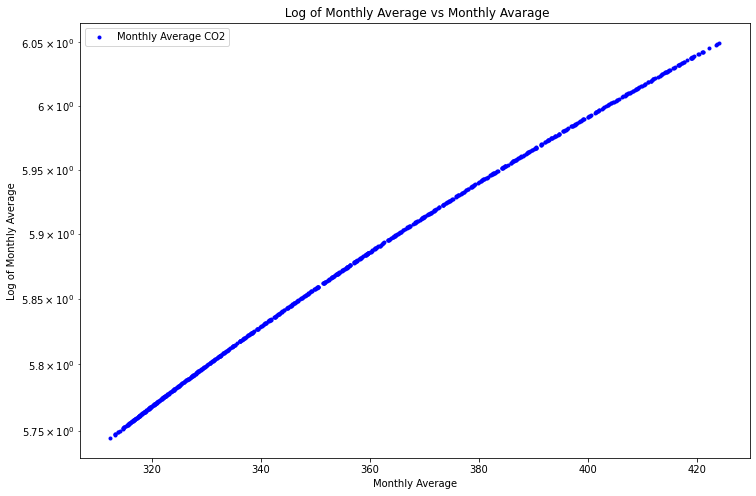

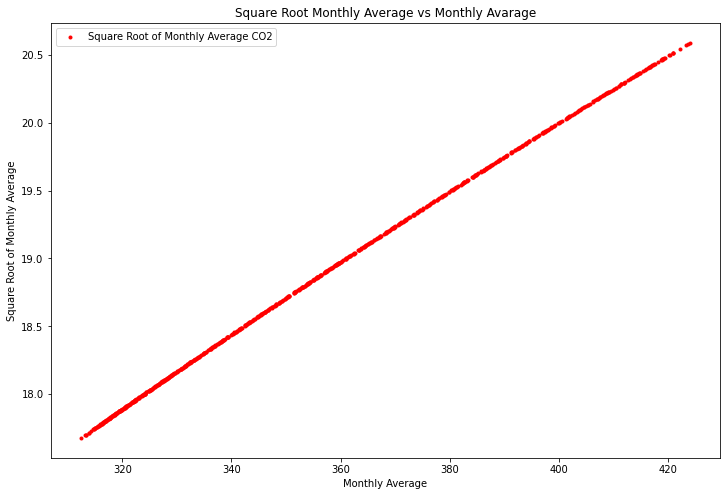

In [11]:
# checking the difference of the plots
# Plot 1: The logarithmic y-axis vs y
plt.figure(figsize=(12, 8))
plt.scatter(y, np.log(y), color='blue', marker=".", label='Monthly Average CO2')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Monthly Average')
plt.ylabel('Log of Monthly Average')
plt.title(' Log of Monthly Average vs Monthly Avarage')
plt.legend()
plt.show()

# Plot 3: The square root of y-values vs y
plt.figure(figsize=(12, 8))
plt.scatter(y, np.sqrt(y), color='red', marker=".", label='Square Root of Monthly Average CO2')
plt.xlabel('Monthly Average')
plt.ylabel('Square Root of Monthly Average')
plt.title('Square Root Monthly Average vs Monthly Avarage')
plt.legend()
plt.show()


**Section b)**

Now I am fitting a linear model $y= ax+b$ and polynomial model (degree 3) $ y =ax^3+bx^2+cx+d$. and I  use `curve-fit` to fit these models to my data.
I check the over-fit or under-fitting by plotting the residuls if they scatter randomly around zero it means we have a good fit.


In [39]:
# Define a linear model
def linear(x, a, b):
    return a * x + b

# Define a polynomial model degree 3 with 4 parameter
def polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x**1 + d 

# Fit the data using a linear function
linear_params, cov_lin = curve_fit(linear, x, y)

# Fit the data using a polynomial function degree 3
poly_params, cov_poly = curve_fit(polynomial, x, y)

# Predict CO2 level in 2050 using both models
predicted_linear = linear(2050, *linear_params)
predicted_poly = polynomial(2050,*poly_params)

print(f"Predicted CO2 concentration in 2050 (linear model): {predicted_linear:.2f}")
print(f"Predicted CO2 concentration in 2050 (polynomial model): {predicted_poly:.2f}")

Predicted CO2 concentration in 2050 (linear model): 454.36
Predicted CO2 concentration in 2050 (polynomial model): 501.77


The linear model predicts a CO2 concentration of $454.36$ in 2050, assuming a constant rate of increase which makes it simple and easy to interpret. However, this approach may underestimate future concentrations as it does not account for potential acceleration in CO2 emissions. 

The polynomial model predicts $501.77$, capturing non-linear trends that suggest faster growth in CO2 concentrations. However, the polynomial model risks overfitting, so both models should be considered along with other factors for more accurate projections.








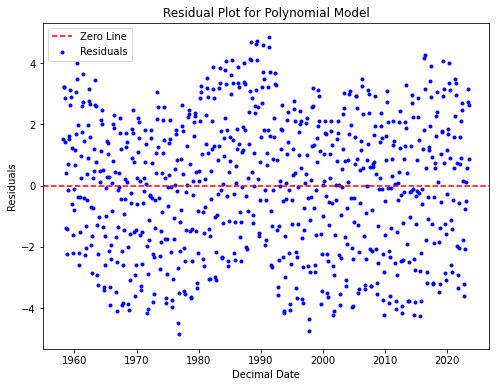

In [40]:
# Calculate predicted values for the test set using the polynomial model
y_pred = polynomial(x, *poly_params)

# Calculate residuals (difference between actual and predicted values)
residuals_poly = y - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals_poly, color='blue',marker=".", label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.xlabel('Decimal Date')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Model')
plt.legend()
plt.show()


The residuals appear to be randomly scattered around zero, indicating that overfitting is unlikely. However, I do notice a pattern, and I’m unsure whether it suggests overfitting or not.

**Section C)**
 Bootstrapping can help you estimate the uncertainties in the parameters of the model.

In [41]:
# Bootstrapping function for poly model degree 3 with number of iteration = 1500
def bootstrap(data, function, iterations=1500):
    new_params = []
    for _ in range(iterations):
        # Resample the data (with replacement)
        sample_data = data.sample(frac=1, replace=True)
        x_sample = sample_data['decimal_date'].values
        y_sample = sample_data['monthly_average'].values
        
        # Fit the polynomial model using curve_fit for new sample data
        fit_params, cov = curve_fit(function, x_sample, y_sample)
        new_params.append(fit_params)
    return np.array(new_params)

# Perform bootstrapping
boot_params = bootstrap(data, polynomial, iterations=1500)

# Calculate the mean and standard deviation of the bootstrapped parameters
boot_mean = np.mean(boot_params, axis=0)
boot_std = np.std(boot_params, axis=0)

# Define parameter names
param_names = ['a', 'b', 'c']

# Print each bootstrapped parameter estimate with its standard deviation
for name, mean, std in zip(param_names, boot_mean, boot_std):
    print(f"{name}= {mean:.4f} ± {std:.4f}")

a= 0.0000 ± 0.0000
b= -0.1961 ± 0.0897
c= 365.7174 ± 178.6693


- $a =0$ The uncertainty is 0, suggesting that across all bootstrap samples, the cubic term consistently had a coefficient of 0. This indicates that higher-order terms $x^3$ might not be necessary to model the data, making the polynomial behave more like a quadratic or linear function.
- $b=-0.192$ , which means quadratic term has a negative coefficient, suggesting that the curve has a downward curvature.
- The great values of uncertainty in the next two parametrs shows our model is unstable. This could mean that the fit is quite sensitive to shifts in the data, and the constant term fluctuates widely depending on the sample used.

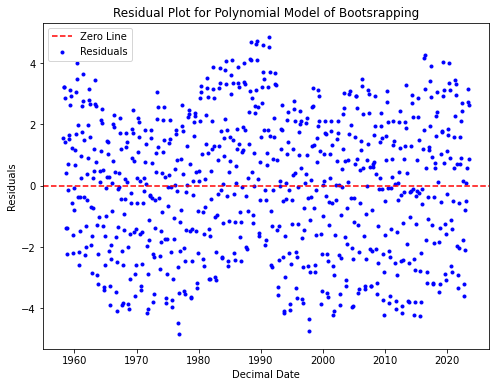

In [42]:
# Calculate predicted values for the test set using the polynomial model
y_pred_boot = polynomial(x, *boot_mean)

# Calculate residuals (difference between actual and predicted values)
residuals_poly = y - y_pred_boot

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals_poly, color='blue',marker=".", label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.xlabel('Decimal Date')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Model of Bootsrapping')
plt.legend()
plt.show()

Here I also check the residuals to make sure I am not overfitting. and this is the same as last plot of the residuals vs desimal date.